<h1> <center> Linear Regression </center> </h1>

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Linear Regression](#section4)<br>
5. [Model Evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
    - 5.2 [Model Evaluation using Rsquared value.](#section502)<br>


<a id=section1></a>

## 1. Problem Statement

__Price of House__  as a __function__ of __Area ,Airconditioning, Bedrooms, Bathrooms, Stories, Mainroad, Guestroom, Basement, Hotwaterheating, Airconditioning, Parking, Prefarea and Furnishingstatus__. Suppose that in our role as __Data Scientist__ we are asked to suggest.

- We want to find a function that given input Price of House for Area, Bedroom, Bathroom and Airconditioning.

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots and line plot.

<a id=section2></a>

## 2. Data Loading and Description

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import metrics

In [4]:
data= pd.read_csv("C:\\Users\\Cartan\\Downloads\\Data\\EDA\\Compeleted\\House Price Prediction\\Housing (2).csv")

In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


What are the **features**?

- Price            :   Price of House
- Area             :   Area of that particular House
- Bedroom          :   No. of Bedrooms in that House
- Stories          :   No. of Stories
- Mainroad         :   Location of Mainroad (Yes or No)
- Guestrom         :   Availability of Guestroom (Yes or No)
- Basement         :   Availability of Basement (Yes or No)
- Hotwaterheating  :   Availability of Hotwaterheating (Yes or No)
- Airconditioning  :   Availability of Airconditioning (Yes or No)
- Parking          :   No. of the parkings available
- Prefarea         :   Prefered Location (Yes or No)
- Furnishingstatus :   Furnishing status


What is the **response**?

- Price:              Price of the given House

In [6]:
data.shape

(545, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [8]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
data.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

No missing value present in our dataset

### Checking the unique values in each columns

In [10]:
q = data["furnishingstatus"].unique().tolist()
w = data["prefarea"].unique().tolist()
e = data["airconditioning"].unique().tolist()
r = data["hotwaterheating"].unique().tolist()
t = data["basement"].unique().tolist()
y = data["guestroom"].unique().tolist()
u = data["mainroad"].unique().tolist()
print(q,w,e,r,t,y,u)



['furnished', 'semi-furnished', 'unfurnished'] ['yes', 'no'] ['yes', 'no'] ['no', 'yes'] ['no', 'yes'] ['no', 'yes'] ['yes', 'no']


### Hot Encoding

Providing unique keys to different categorical type of data

In [11]:
data["furnishingstatus"]=data["furnishingstatus"].map({"furnished":3,"semi-furnished":2,"unfurnished":1})
data["prefarea"] = data["prefarea"].map({"yes":1,"no":0})
data["airconditioning"] = data["airconditioning"].map({"yes":1,"no":0})
data["hotwaterheating"] = data["hotwaterheating"].map({"yes":1,"no":0})
data["basement"]=data["basement"].map({"yes":1,"no":0})
data["guestroom"]=data["guestroom"].map({"yes":1,"no":0})
data["mainroad"]=data["mainroad"].map({"yes":1,"no":0})

In [12]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3


<a id=section3></a>

## 3. Exploratory Data Analysis

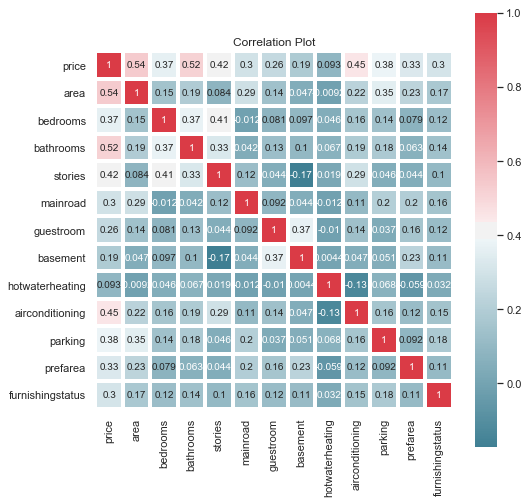

In [13]:
fig, ax =plt.subplots(figsize=(8, 8))
plt.title("Correlation Plot")
sns.heatmap(data.corr(), mask=np.zeros_like(data.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True,linewidths=3)
plt.show()

In [14]:
data1= data.iloc[0:,0:2]
data1.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


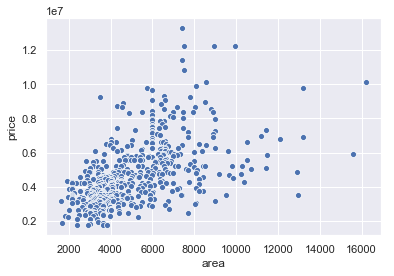

In [16]:
sns.scatterplot(x="area", y="price", data=data)

In [ ]:
sns.jointplot(x='area',y='price',data=data1, color='brown', size=12, kind="reg")

### Standaradization of Price and Area

There is need to standaradize the Price and Area on the single scale , hence both must be having different measurement units.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data1)
data1 = scaler.transform(data1)

In [ ]:
data2 = pd.DataFrame(data1)
data2.columns = ['price', 'area']
data2.head()

In [ ]:
data3= data.iloc[0:,2:]
data3.head()

### New Data Head

In [ ]:
df = pd.concat([data2, data3], axis=1)
df.head()

<a id=section4></a>

## 4. Linear Regression

In [ ]:
feature_cols = ['area','bedrooms', "stories",'airconditioning']               
X = df[feature_cols]                                     

In [ ]:
print(type(X))
print(X.shape)

In [ ]:
y = df["price"]
y.head()

In [ ]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
print(X_test.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

### Intercept

In [ ]:
print("The Intercept for the given Liner Regresssion is = ")
print(lm.intercept_)

In [ ]:
a=list(lm.coef_)
print(a)


### Coeff's

In [ ]:
for m,n in zip(feature_cols,a):
     print(m,"=",n)

### Prediction 

In [ ]:
y_pred_train = lm.predict(X_train)  

In [ ]:
y_pred_test = lm.predict(X_test)       

In [ ]:
def comp():
    compare = pd.DataFrame({'Prediction': y_pred_test, 'Test Data' : y_test})
    compare["Prediction"]= (compare["Prediction"]*data["price"].std())+data["price"].mean()
    compare["Test Data"]= (compare["Test Data"]*data["price"].std())+data["price"].mean()
    c=compare.head()
    return(c)

comp()

<a id=section5></a>

# 5. Evaluation of Model

<a id=section501></a>

## 5.1 Model evaluation using metrics

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Price predictions

In [ ]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [ ]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Price predictions

In [ ]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [ ]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Price predictions

In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [ ]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

<a id=section502></a>

## 5.2 Evaluation by Rsquared Method:-

In [ ]:
yhat = lm.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

In [ ]:
yhat = lm.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)